In [1]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from gplearn import genetic
from gplearn.genetic import SymbolicTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import sklearn.ensemble as ensemble  # ensemble learning: 集成学习
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [2]:
dataset= r'out2 ccopy 2.csv'
data=pd.DataFrame(pd.read_csv(dataset))

In [3]:
data

,CH5N2,CH3NH3,Rb,Cs,Pb,Sn,I,Br,ETL density(g/cm3),ETL Bandgap(eV),ETL HOMO(eV),ele Molecular Weight,glass Work function,PCE
0,0.500,0.500,0.0,0.00,1.0,0.0,1.5,1.5,6.61,0.65,5.521,107.86800,4.50,20.50
1,0.200,0.400,0.0,0.40,1.0,0.0,1.5,0.0,3.62,2.68,1.367,107.86800,4.50,20.10
2,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,19.04
3,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,5.44,0.72,0.840,107.86800,4.50,18.82
4,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,6.61,0.65,5.521,107.86800,4.50,18.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.000,1.000,0.0,0.00,1.0,0.0,1.5,0.0,3.62,2.68,1.367,196.96657,4.50,8.29
74,0.255,0.595,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,17.60
75,0.850,0.000,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,13.90
76,0.000,0.000,0.0,1.00,1.0,0.0,0.0,3.0,3.62,2.68,1.367,107.86800,4.57,7.93


In [4]:
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

#读取原数据集的特征和目标值
X = data.values[:, :-1]
y = data.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])

for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [5]:
import xgboost
xgb_reg = xgboost.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [6]:
from sklearn.metrics import mean_squared_error

y_pred = xgb_reg.predict(X_test)
val_error = mean_squared_error(y_test, y_pred) 
print("Validation MSE:", val_error)    

Validation MSE: 33.59897219707606


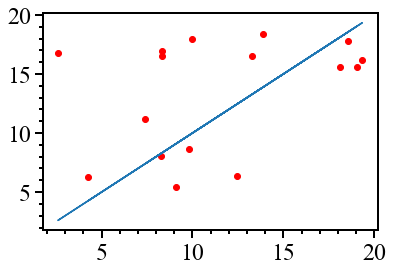

In [7]:
#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_pred, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()
plt.show()

# voting

# 创建模型
分别创建四个基本模型：随机森林分类器，极端随机树(Extra-Trees)分类器，支持向量机分类器和多层感知机分类器。

In [15]:
from sklearn.svm import LinearSVR
from sklearn import ensemble
from sklearn.neural_network import MLPRegressor

random_forest_clf = RandomForestRegressor(n_estimators=100, random_state=42)  
extra_trees_clf = ExtraTreesRegressor(n_estimators=100, random_state=42)
svm_clf = LinearSVR(max_iter=100, tol=20, random_state=42)
mlp_clf = MLPRegressor(random_state=42)

In [16]:
estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the RandomForestRegressor(random_state=42)
Training the ExtraTreesRegressor(random_state=42)
Training the LinearSVR(max_iter=100, random_state=42, tol=20)
Training the MLPRegressor(random_state=42)


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [17]:
[estimator.score(X_test, y_test) for estimator in estimators]

[0.05934399485072284,
 0.1426390340917133,
 -0.9640352026663264,
 0.06339253686392676]

In [19]:
from sklearn.ensemble import VotingRegressor

named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf),
    ("mlp_clf", mlp_clf),
]

In [20]:
voting_clf = VotingRegressor(named_estimators)

In [21]:
voting_clf.fit(X_train, y_train)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


VotingRegressor(estimators=[('random_forest_clf',
                             RandomForestRegressor(random_state=42)),
                            ('extra_trees_clf',
                             ExtraTreesRegressor(random_state=42)),
                            ('svm_clf',
                             LinearSVR(max_iter=100, random_state=42, tol=20)),
                            ('mlp_clf', MLPRegressor(random_state=42))])

In [22]:
voting_clf.score(X_test, y_test)

0.06594529152293993

# SVM

In [23]:
svm_clf = LinearSVR(max_iter=100, tol=20, random_state=42)

R2: 0.6569024048614149
RMSE: 7.101921475226348
r: (0.4914092203361452, 0.05322032009597569)
MAE: 5.884949427014455
R2b: -0.9640352026663264
MSE: 50.43728864028118


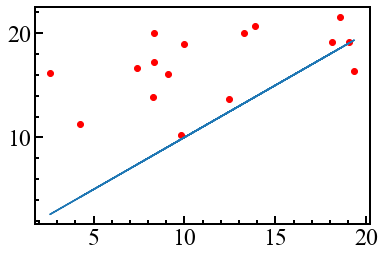

In [26]:
svm_clf.fit(X_train, y_train)
y_pred=svm_clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_pred) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_pred))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_pred, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()
plt.show()